## Context:
Context
This dataset (source) consists of data from almost 10,000 borrowers that took loans - with some paid back and others still in progress. It was extracted from lendingclub.com which is an organization that connects borrowers with investors. We've included a few suggested questions at the end of this template to help you get started.

In [1]:
# load packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick

In [2]:
# Load data from the csv file
df = pd.read_csv("D:/data science/Projects/loan_data.csv", index_col= None)
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [3]:
# change the dots in column names to underscore
df.columns = [c.replace(".", "_") for c in df.columns]
print("There are  total {} rows/variables in dataset." .format(df.shape[0]))
print("-" *47)
print("There are total {} columns in dataset." .format(df.shape[1]))
# df.shape

There are  total 9578 rows/variables in dataset.
-----------------------------------------------
There are total 14 columns in dataset.


### Understanding the Variables
Variables can be thought of as the building blocks of the dataset, providing insights into different features, characteristics, or attributes of the underlying information. I will construt a dataframe out of features in dataset and the general description of the features.

In [7]:
varaibles = pd.DataFrame(columns= ['Variable', 'Num of Unique Values', 'null', 'values'])
df.columns
for i, col in enumerate(df.columns):
    varaibles.loc[i] = [col, df[col].nunique(), df[col].isnull().sum(), 
                       df[col].unique().tolist()]
variable_dict = pd.read_csv("D:/data science/Projects/variable_explanation.csv", index_col= 0)
varaibles.set_index('Variable').join(variable_dict)

,Num of Unique Values,null,values,Explanation
Variable,,,,
credit_policy,2,0,"[1, 0]",1 if the customer meets the credit underwritin...
purpose,7,0,"[debt_consolidation, credit_card, all_other, h...",The purpose of the loan.
int_rate,249,0,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078...",The interest rate of the loan (more risky borr...
installment,4788,0,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13...",The monthly installments owed by the borrower ...
log_annual_inc,1987,0,"[11.35040654, 11.08214255, 10.37349118, 11.299...",The natural log of the self-reported annual in...
dti,2529,0,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ...",The debt-to-income ratio of the borrower (amou...
fico,44,0,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ...",The FICO credit score of the borrower.
days_with_cr_line,2687,0,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406...",The number of days the borrower has had a cred...
revol_bal,7869,0,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,...",The borrower's revolving balance (amount unpai...


In [ ]:
variables = pd.DataFrame(columns= ['Variable', 'Num of Unique Values', 'Num of Null Values', 'Values'])
for i, col in enumerate(df.columns):
    variables.loc[i] = [col, df[col].nunique(), df[col].isnull().sum(), df[col].unique().tolist()]

# import the variable description dataframe and join it variables dataframe

variable_dict = pd.read_csv("D:/data science/Projects/variable_explanation.csv", index_col= 0)
variables.set_index('Variable').join(variable_dict)

Now its time to delve into data analysis and try our hands at the following tasks:
- Discover useful insights and visualize them in the most interesting way possible.
- Determine the time users take to repay their loans.
- Build a model that predicts the likelihood of users repaying their loans within a certain period.
- Identify the types of individuals who take loans for what purposes.

## Problem Statement
The goal is to extract valuable insights from the existing data and develop a model to predict the likelihood of a loan not being fully repaid.

In the initial phase, exploratory analysis will be conducted to gain information and insights from the data. Tables and visualizations will be employed to enhance comprehension of the data and address pertinent questions.

In the subsequent phase, the data will be utilized to forecast the probability of a loan not being fully repaid. Various models will be trained, and the best performing one will be chosen.

In [8]:
# Before going to analysis, the dataset has to be examined & cleaned.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


For convenience Organize the features of dataset in usefull groups,

In [9]:
# Numerical features contain numerical data
NUMERIC = ["int_rate", "installment", "log_annual_inc", "dti", "fico", "days_with_cr_line", "revol_bal", "revol_util", "inq_last_6mths", "delinq_2yrs", "pub_rec"]
# Binary feature contains binary data (0, 1)
BINARY= ["credit_policy","not_fully_paid"]
# Categorical feature contains categoical values
CATEGORICAL = ["purpose"]
# Loan features related to loan itself
LOAN = ["int_rate", "installment", "days_with_cr_line", "revol_bal", "revol_util"]
# Person features related to the person getting the loan
PERSON = ["log_annual_inc", "dti", "fico", "inq_last_6mths", "delinq_2yrs", "pub_rec"]
# Target feature for training the model
TARGET = ["not_fully_paid"]

#### Missing Values  and Imputations
Missing values can create error in our analysis, so treating them accordingly is very important. But here in our current dataset, we can see we don't have any missing values. so, we can skip imputing step here.

Although we don't have any missing values in dataset. Anyhow, we will verify for any prospective null values.

In [10]:
# checking for null values
df.isnull().sum()[df.isnull().sum() >0]

Series([], dtype: int64)

In [12]:
# General summary statistics to familiarize ourself with the data
df.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### Outliers
Outliers might skew aggreagtions and create bias in the training model. We don't have much features in dataset, we can check the min & max of each feature and locate outliers. 

For example, for the binary features we expect values of 0 minimum and 1 maximum.

In [13]:
# Binary features
print(df[BINARY].agg(['min', 'max']))

     credit_policy  not_fully_paid
min              0               0
max              1               1


In [14]:
# Numeric features
df[NUMERIC].agg(['min', 'max'])

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
min,0.0600,15.67,7.547502,0.00,612,178.958333,0,0.0,0,0,0
max,0.2164,940.14,14.528354,29.96,827,17639.958330,1207359,119.0,33,13,5


The ranges of all features appear to be within the expected values, except for revol_bal, which spans from 0 to 1.2 million! Let's delve deeper into this particular feature by visually presenting its distribution using a boxplot.

Text(0.5, 1.0, 'Distribution of revolving balance')

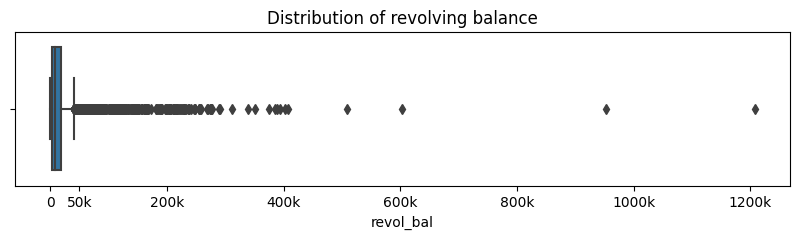

In [15]:
plt.figure(figsize=(10,2))
sns.boxplot(data=df, x= 'revol_bal')
plt.xticks(ticks= [0, 50000, 200000, 400000, 600000, 800000, 1000000, 1200000],
          labels= ['0', '50k', '200k', '400k', '600k', '800k', '1000k', '1200k'])
plt.title("Distribution of revolving balance")

The boxplot reveals that most values are clearly below 50,000, with some outliers ranging from 50,000 to 500,000.
Additionally, there are four extremely high points above 500,000. These four points could be errors or represent exceptional cases. Whatever the case, they would introduce bias to further analysis and model-training. We can drop these extreme four without loosing much information.

In [16]:
# get the indices of outliers and drop them
indices = df[df['revol_bal'] >500000].index
indices

Int64Index([9042, 9149, 9307, 9535], dtype='int64')

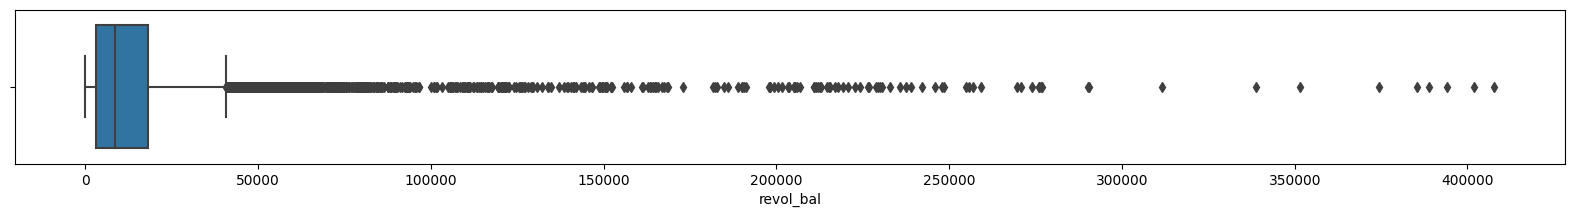

In [17]:
df_new = df.drop(indices)
# plot the boxplot again & check for outliers
plt.figure(figsize=(20,2))
sns.boxplot(data=df_new, x = 'revol_bal');

Things looks much better now, but there are still outliers but they are not extreme & they should be useful in training our model.

### Nature of Loans
Let's examine the loans by various variables and gain insights. First, We will start by exploring purpoese of the loans in detail.

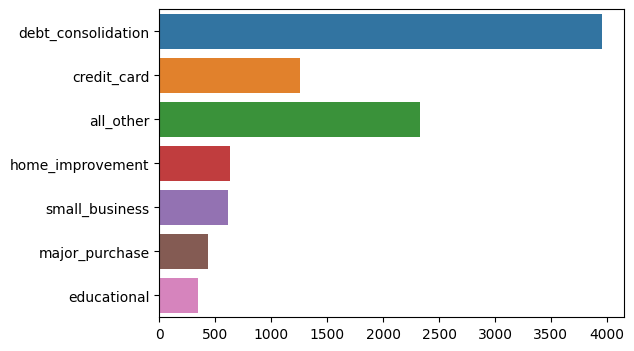

In [18]:
# Visualize what kind of loans people usually apply for
plt.figure(figsize= (6, 4))
sns.countplot( y =df_new['purpose'])
plt.xlabel("")
plt.ylabel("")
plt.show();

Most loans are issued for debt consolidation followed by credit card and the least number of loans are for major purchase and educational purpose.

In [19]:
df_new['not_fully_paid'].dtype

dtype('int64')

##### Out of all loans distributed, how many of these loans are not fully paid back?

C:\Users\hp\AppData\Local\Temp\ipykernel_96136\1631867886.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(y = df_new['purpose'], x= df['not_fully_paid'].astype('int'), ci = None)


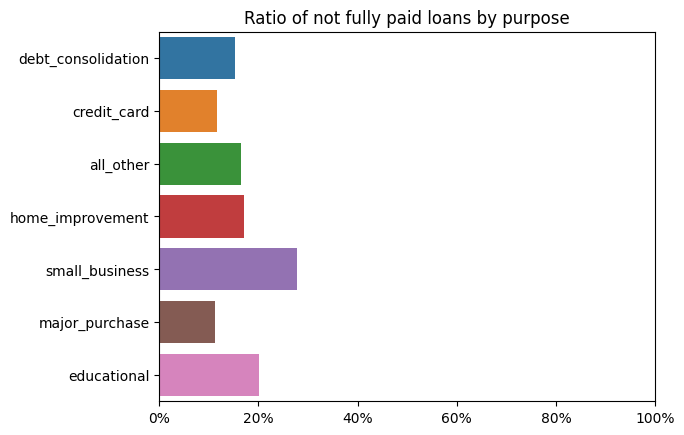

In [20]:
# Convert above column to int for convenicence, to calculate the mean.
ax = sns.barplot(y = df_new['purpose'], x= df['not_fully_paid'].astype('int'), ci = None)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.title("Ratio of not fully paid loans by purpose")
plt.xlim(0,1)
plt.ylabel(None)
plt.xlabel(None);

Educational and small bussinesses have higher ratio of not being paid back while credit card loans are least risky among them.


Lets see the relation between not_fully_paid and credit_policy(1 if the customer meets the credit underwriting criteria and 0 otherwise)

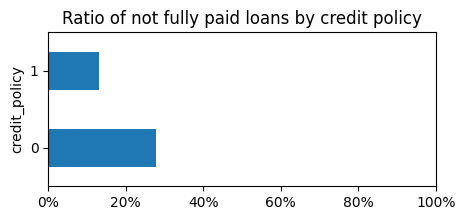

In [21]:
ratio = df_new.groupby('credit_policy')['not_fully_paid'].mean()
ax = ratio.plot.barh(figsize=(5,2), title='Ratio of not fully paid loans by credit policy')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.xlim(0,1);

Looks like only about 15% of people that meets the credit card criteria do not pay back their loans while the percentage is doubled for those that do not meet the criteria i.e. almost 30%

We will further dig deep to examine some of other features in relation to whether a loan was fully paid back or not.
Since we are ultimately interested in predicting the probability of not fully paying back loans, we should only consider the features that are available at the time of issuing a loan:
 - int_rate,
 - installment,
 - log_annual_inc,
 - dti
 - fico.

In [22]:
# function to plot visuals about the distribution of a feature by various categories of interest

def show_distribution(feature='int_rate', name="Interest Rate"):
    # define the subplot areas
    fig, axes = plt.subplots(1,3, figsize=(15,3))
    
    # plot the boxplots by purpose
    sns.boxplot(data=df_new, x=feature, y='purpose', ax=axes[0], )
    axes[0].set_ylabel("")
    axes[0].set_xlabel(name)
    axes[0].set_title(name+" by loan purpose")
    # plot the boxplots by not_fully_paid
    y = df_new.not_fully_paid.astype('category') 
    sns.boxplot(data=df_new, x=feature, y=y, ax=axes[1])    
    axes[1].set_ylabel("not fully paid")
    axes[1].set_xlabel(name)
    axes[1].set_title(name+" by paid status")
    # plot the feature distribution 
    sns.histplot(x=df_new[feature], cumulative=False, ax=axes[2])
    #axes[2].set_ylabel("not fully paid")
    axes[2].set_xlabel(name)
    axes[2].set_title("Distribution of "+name)


#### (I) int_rate:
###### "The interest rate of the loan (more risky borrowers are assigned higher interest rates)"

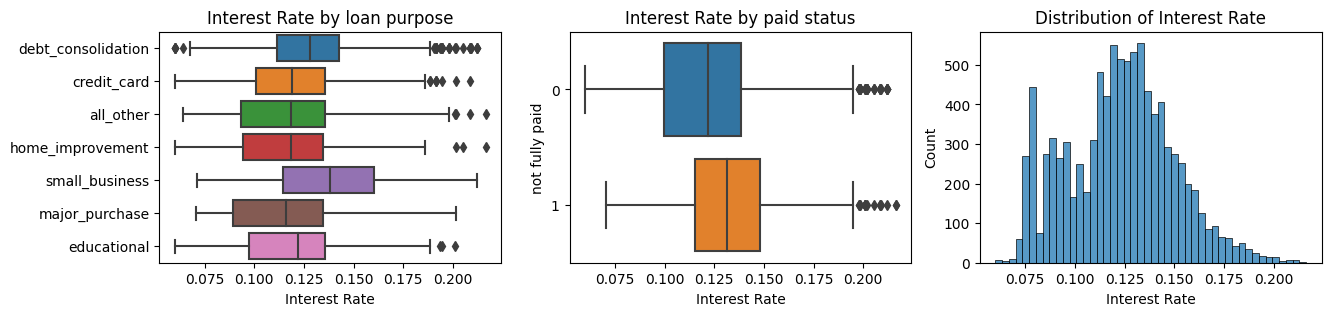

In [23]:
show_distribution('int_rate', 'Interest Rate')

#### Key Insights from graph
##### 1st Graph

the first graph shows that the purpose of the loan does not effects its interest rate much, as we can see all boxes are almost at same place with only one exception: small businesses tend to have higher interest rates than the rest. Their average is higher than the 75th percentile of other loan purposes. 

##### 2nd Graph
The loans that were not fully paid back have slightly higher interest rates but not by that much margin.

##### 3nd Graph
The interest rates tends to follows almost a normal distribution with some loans having interest rates lower than the average, skewing the distrbution to the left a bit.

#### (II) Installment:
###### "The monthly installments owed by the borrower if the loan is funded."

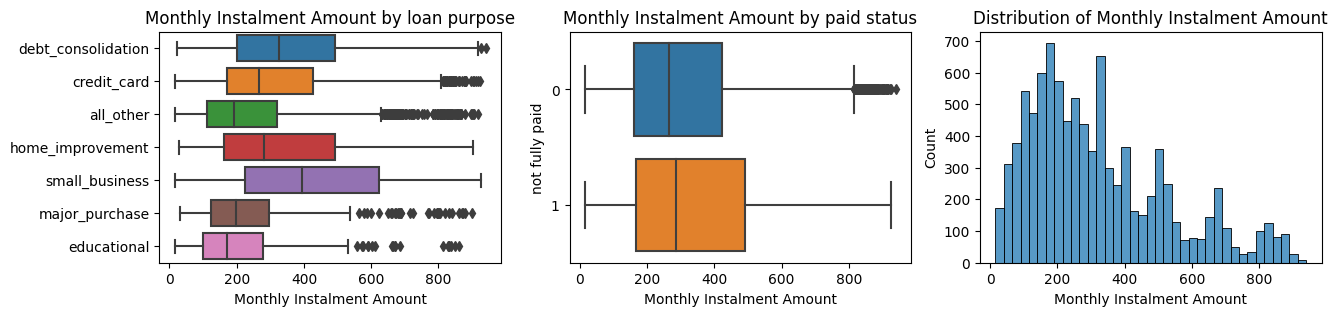

In [24]:
show_distribution("installment", "Monthly Instalment Amount")

#### Key Insights from graph
##### 1st Graph
the first graph shows the small businesses have the highest monthly instalment, with debt consolidation and home improvement comes the second and the rest have almost same instalment range.

##### 2nd Graph
The instalment amount does not seem to have any relation with pay back loans, the difference is almost negligible 

##### 3nd Graph
The distribution of instalment amount shows most of the loans have lower instalments i.e. below $400.

As small bussinesses tends to have hightest monthly instalment plans, we will compare the summary statistics for instalment amounts of small business loans versus rest,

In [25]:
print(df_new.groupby(by=lambda x: df_new.loc[x].purpose == 'small_business', sort=False)\
['installment'].describe().round().rename({0:"Others",1:"Small Business"}))

                 count   mean    std   min    25%    50%    75%    max
Others          8957.0  311.0  202.0  16.0  162.0  263.0  414.0  940.0
Small Business   617.0  433.0  248.0  16.0  225.0  393.0  624.0  927.0


The take away point is, although the min and max of above two groups are almost same,  the mean amount of monthly installment amounts is $120 higher for small business loans.

#### (III) log_annual_inc:
###### "The natural log of the self-reported annual income of the borrower."

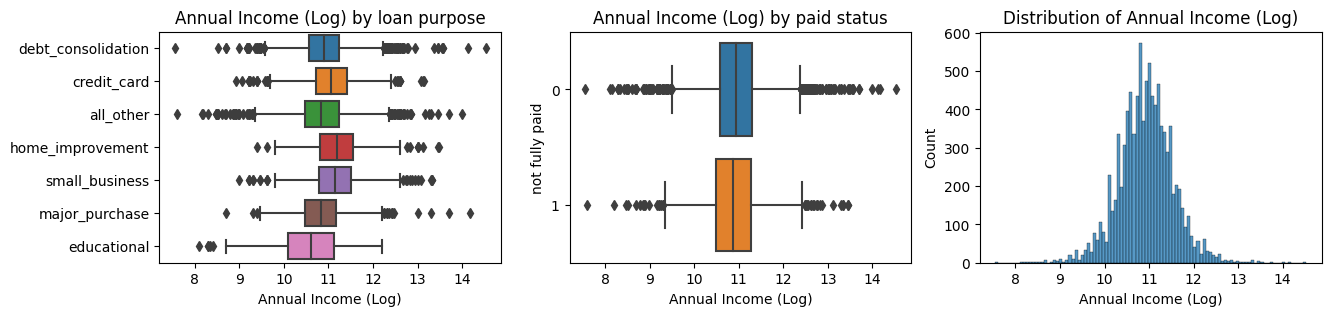

In [26]:
show_distribution("log_annual_inc", "Annual Income (Log)")

#### Key Insights from graphs:
No need to dig deep into above graphs.


We observe that the feature exhibits a normal distribution, aligning with our expectations.

#### IV. dti (Debt-to-Income ratio):
###### "The debt-to-income ratio of the borrower (amount of debt divided by annual income)."

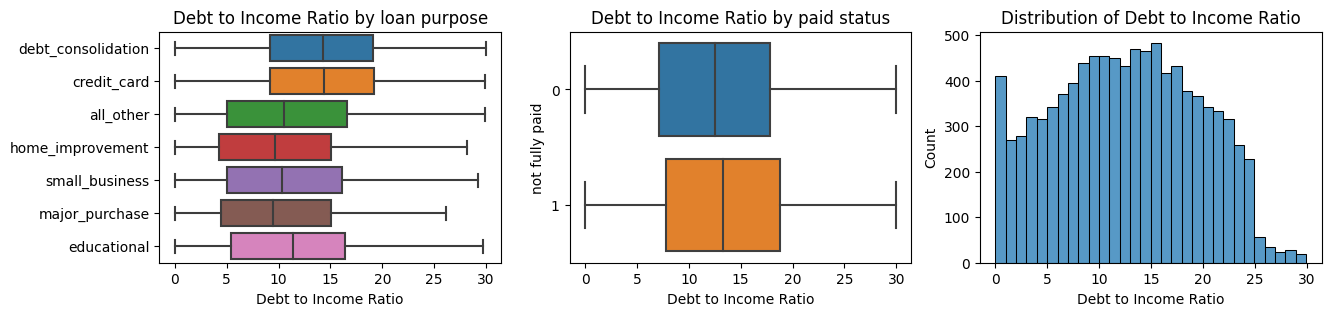

In [27]:
show_distribution('dti','Debt to Income Ratio')

#### Key Insights from the graphs:
###### 1st Graph
Its look like people with higher debt to income ratios i.e, those that have larger debts, tend to get loans for debt consolidation and credit card funding.

###### 2nd Graph
The debt to income ratio does not seem to greatly affect wether a loan is fully paid back or not.

###### 3rd Graph
The histogram shows that a lot of loans are taken by people with Zero dti or dti in lower range and few people take loans with dti higher than 25.

#### fico:
###### ""The FICO credit score of the borrower." FICO is a comparative estimate of creditworthiness."

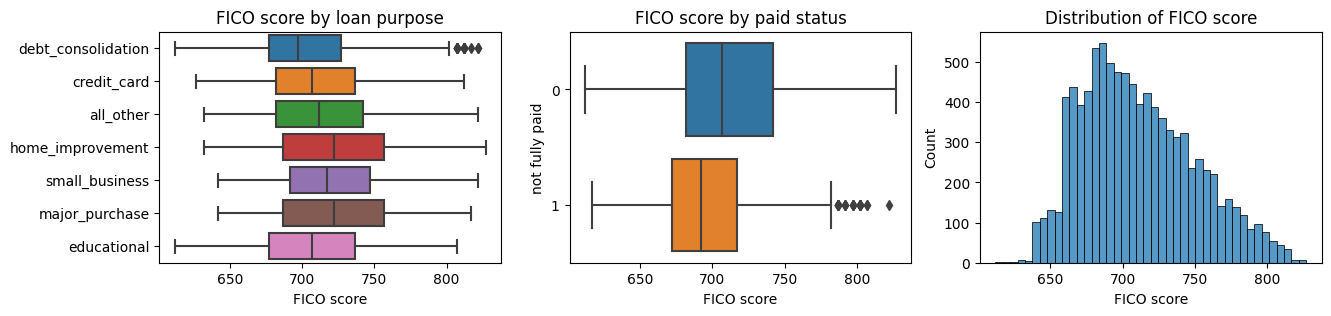

In [28]:
show_distribution("fico", "FICO score")

#### Key insights from the graph
There is nothing special to note regarding FICO by loan purpose, but it seems like people paying back their loans have higher FICO scores, i.e. more creditworthiness; this might be a good indicator to predict if a loan will be fully paid back. For FICO scores greater than 700, the amount of people having higher scores gradually decreases.

##### Conclusions of exploratory analysis
 So, here are the insights & conclusions drawn so far:

- Individuals who fail to meet the credit criteria demonstrate a higher likelihood of not repaying a loan.

- The purpose of a loan exhibits a correlation with the repayment status, suggesting that the nature of the loan impacts its likelihood of being paid back.

- Loans designated for small businesses often incur higher interest rates compared to other loan purposes.

- Loans intended for small businesses and debt consolidation tend to have the highest monthly installment amounts.

- On average, small business loans have monthly installments that are approximately $120 higher than those for other types of loans.

- There is no significant relationship between the natural logarithm of income and the fully-paid status of loans.

- The debt-to-income ratio (DTI) does not exhibit a strong correlation with the likelihood of loans being fully paid back.

- Higher FICO scores are indicative of loans being fully paid back, suggesting a positive association between FICO scores and loan repayment behavior.

### Find out what kind of people take loan for what purpose?
In order to answer this question, We have divided the persons taking loans into clusters.hen, the characteristics of each cluster will be shown as well as the purpose(s) the loans of this cluster were taken for.

Out of all features we have shortlisted below mentioned features for clustering and i will state it, why we shortlisted these specific features.
1. log_annual_inc (Logarithm of Annual Income):
Income is a crucial factor in determining a person's ability to repay a loan. Using the logarithm of annual income can help in handling a wide range of income values more effectively, making the clustering process less sensitive to extreme values.

2. dti (Debt-to-Income Ratio):
The debt-to-income ratio is a key metric in assessing an individual's financial health. It represents the proportion of a person's income that goes toward debt repayment.

3. fico (FICO Credit Score):
Credit scores, such as the FICO score, are widely used in the lending industry to assess creditworthiness. Clustering individuals based on their credit scores can help identify groups with different levels of creditworthiness. 

In [29]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [30]:
df_clustering =df_new[["log_annual_inc", "dti", "fico"]]
ss = StandardScaler()
df_clustering = ss.fit_transform(df_clustering)
# df_clustering
inertias = []
for k in range(1, 11):
    km = KMeans(k)
    km.fit(df_clustering)
    inertias.append(km.inertia_)

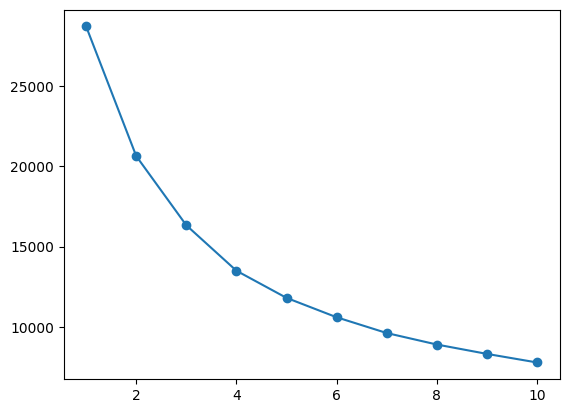

In [32]:
plt.plot(range(1,11),inertias, marker = 'o')
plt.show();

According to the elbow method for the chart above, 3 or 4 clusters is the optimal choice.

In [34]:
# fit the chosen KMeans model for 3 clusters
km = KMeans(n_clusters=3, random_state=42)
km.fit(df_clustering)
# add the cluster labels to the dataframe
df_new['cluster'] = km.labels_

# show the PERSON characteristics for each cluster (using the average value)
df_new.groupby('cluster')[PERSON].mean()

,log_annual_inc,dti,fico,inq_last_6mths,delinq_2yrs,pub_rec
cluster,,,,,,
0,11.256652,8.199747,751.667605,1.311994,0.068238,0.022863
1,10.967790,18.769314,696.078883,1.686428,0.179569,0.072513
2,10.526138,7.836938,689.816157,1.690449,0.241978,0.087958


We will name the clusters depending upon the findings above. The last three features have little difference between the clusters. These qualities are defined after taking the loan.

###### - Cluster 0: "TrustWorthy" 
Person with highest income in dataset, highest fico and normal dti ratio.

###### - Cluster 1 : "Debtors" 
Persons with the highest dti ratio, and average annual income & fico score

###### - Cluster 2: "High Risk"
Lowest income in the set, lowest dti ratio, low fico.

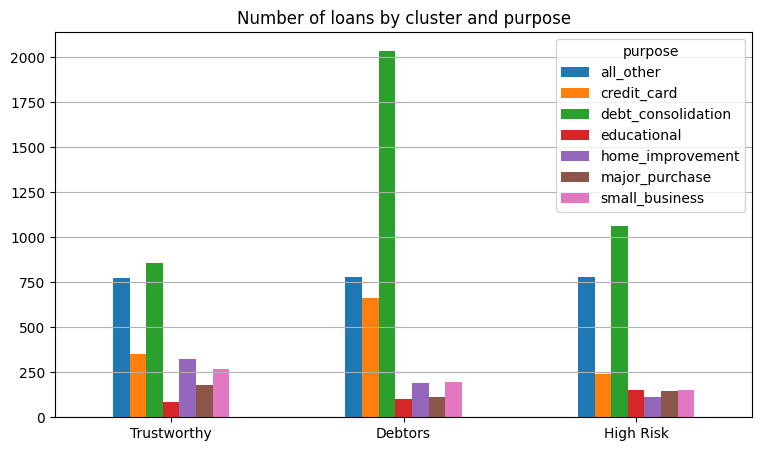

In [35]:
# plotting the loan purpose for each cluster.
pd.crosstab(df_new.cluster, df_new.purpose).rename({0 : 'Trustworthy', 1 : 'Debtors', 2 : 
                                                    'High Risk'}).plot.bar(figsize=(9,5), rot=0, sort_columns=False, )
plt.grid(axis='y')
plt.xlabel("")
plt.title("Number of loans by cluster and purpose");

#### what kind of people take loan for what purpose?

### Answer
There is general trend in all categories i.e, the most popular purpose of the loan is "Debt Consolidation" followed by mix of purposes and for credit card.
- The "trustworthy" people want to expand their business or to enjoy their good status with home improvements.
- The "debtors" take loans mostly for debt consolidation and fund their credit cards.
- The "high risk" category, are taking loans for a mix of purposes, but more than the other clusters for educational purposes, perhaps they are students having low income, since they have not gone into the work arena yet.

In [37]:
df_new['not_fully_paid'].value_counts()

0    8043
1    1531
Name: not_fully_paid, dtype: int64

#### What is the ratio of fully paid back loans by cluster?

In [42]:
df_new.groupby('cluster')['not_fully_paid'].mean()

cluster
0    0.104819
1    0.176629
2    0.193280
Name: not_fully_paid, dtype: float64

- In Cluster 0(trustworthy), on average, 10% of loans are not fully paid back.
- In Cluster 1(debtor), on average, 17% of loans are not fully paid back.
- In Cluster 2(hig risk), on average, 19% of loans are not fully paid back.

#### Further work:
Here the clusters were divided on three features.But there are more features available, and an analysis on those might give more useful insights.

#### Individuals who choose to take out loans, what is the average duration it takes for them to repay the loan?

To answer this question we don't have many options to select from dataset, the best one seems "days_with_cr_line", assuming the person has credit line as long as the loan exists. Another feature to take into consideration is "not_fully_paid" column and only select the entries where loans are fully paid back.

In [59]:
# paid = df_new[df_new['not_fully_paid'].isin([0])]
paid_df = df_new.query('not_fully_paid == 0')
df_new['days_with_cr_line'][:2]

0    5639.958333
1    2760.000000
Name: days_with_cr_line, dtype: float64

Data here is in days, we have to convert it into years instead(divide by 365)

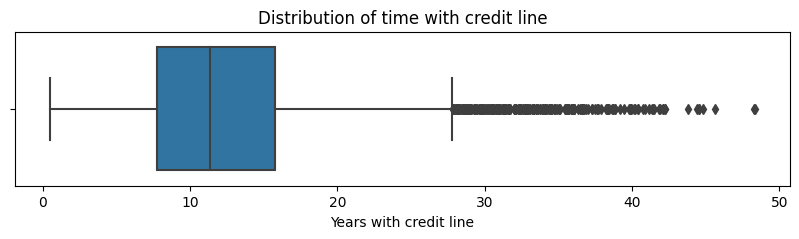

In [64]:
plt.figure(figsize = (10, 2))
sns.boxplot(x = paid_df['days_with_cr_line']/365)
plt.xlabel("Years with credit line")
plt.title("Distribution of time with credit line")
plt.show();

Above graph shows majority of loans have credit line between 8 to 15 years,  with average being around 12 years. Some fraction of credit lines go beyond the peroid of 27/28 years(Outliers).

#### Relation between Credit Line & Loan Purpose:
Does the purpose of the loan and credit line have any relation, does individual loan credit line changes with different loan purpose.

###### Does credit line peroid changes with the purpose of the loan?

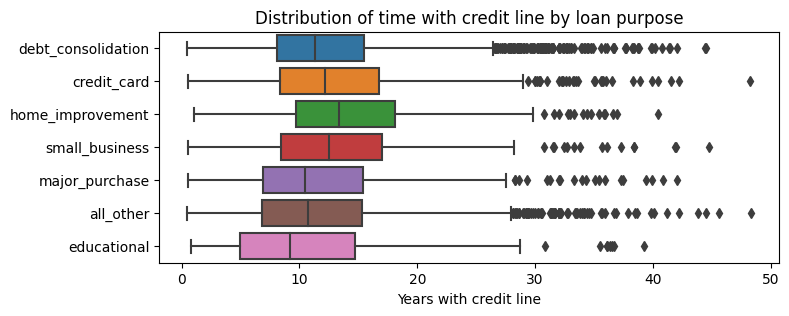

In [71]:
plt.figure(figsize=(8, 3))
sns.boxplot(x = paid_df['days_with_cr_line']/365, y = paid_df['purpose'])
plt.xlabel("")
plt.xlabel("Years with credit line")
plt.title("Distribution of time with credit line by loan purpose")
plt.ylabel(None);

More or less all purposes have same distribution of credit line of time, can't draw any productive conclusion from above graph.

###### Another question arises from the analysis is, Is the credit line is different or same for each cluster???

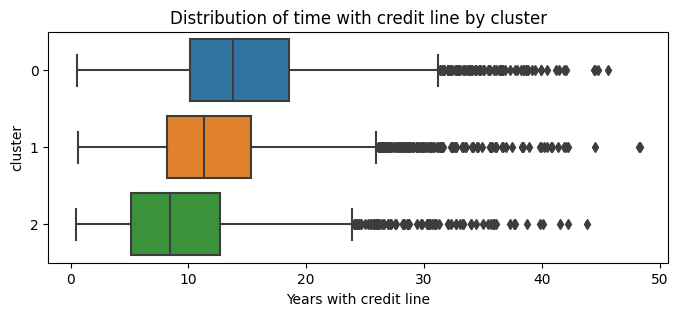

In [79]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=paid_df.days_with_cr_line/365, y=paid_df['cluster'].astype('category'))
plt.xlabel("Years with credit line")
plt.title("Distribution of time with credit line by cluster");
plt.show();

"High Risk" has shorter loans, between 5-12 years, the "Debtors" are between 9-14 years,while "Trustworthy" group has wider spread of values, indicating greater longer and variability in the duration of holding credit lines.

## Answer:

Based on the analysis above, we can infer that the typical duration for loan repayment falls within the range of 8-15 years, with an average repayment period of approximately 12 years. Interestingly, it appears that the purpose of the loan does not significantly influence the repayment time. However, the analysis suggests that the quality of the individual taking the loan plays a crucial role. Notably, higher-risk loans tend to be repaid more promptly.

### Building machine learning model for prediction:

Before building model, we will have quick look at the target.

## Target: "Not Fully Paid"

Text(0, 0.5, '')

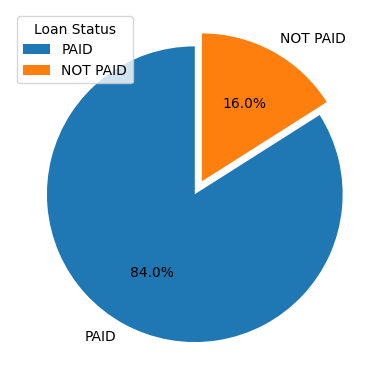

In [94]:
df['not_fully_paid'].value_counts().plot(kind = 'pie', labels= ['PAID', 'NOT PAID'], autopct='%1.1f%%', startangle=90,
                                        explode = [0.0, 0.1])
plt.legend(title = "Loan Status")
plt.ylabel(None)

Since the dataset is highly imbalanced ("not fully paid" is only 16%), the training will be made with a special argument for class_weights.

### Now comes the real part, Prediciting the probability wether user will be able to pay back their loan or not.
###### Steps:
We will train four models for classification, as the dataset is highly imbalance
- Build model
- Train model
- Evaluate it

In first stage we will train the model straightaway, without scaling and hyperparameter tunning.

In [102]:
from sklearn.model_selection import train_test_split

# Selected only 5 features to train the mode
numeric = ['int_rate', 'installment', "log_annual_inc", "dti", "fico"]
target = ['not_fully_paid']

In [103]:
X = df_new[numeric]
y = df_new[target]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [105]:
# train the models

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)

from sklearn.svm import SVC
svc = SVC(class_weight='balanced', probability=True)
svc.fit(X_train, y_train)

from xgboost import XGBClassifier
# xgb classifier's equivalent of "class_weight" argument is "scale_pos_weight"
xgb = XGBClassifier(scale_pos_weight = 5.25, n_jobs=-1, verbose=0) 
xgb.fit(X_train, y_train)

[19:15:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Model Evaluation:
As dataset is highly imbalanced, so in such cases accuracy is not a good metric. The standard parameter to use for imbalanced set is roc_auc.
        
     Additionally, we will be using recall & f1 score.
     

In [108]:
from sklearn.metrics import recall_score, accuracy_score, roc_auc_score, f1_score, precision_score

# construct a function to show the scores of each model in a table and visualize of easy comparison

def show_scores(models, X_train, y_train, X_test, y_test):

    scores = []

    for m in models:
#         y_pred_train = m.predict(X_train)
        y_pred_test  = m.predict(X_test)
#         y_pred_proba_train = m.predict_proba(X_train)
        y_pred_proba_test  = m.predict_proba(X_test)
        name = f"{m}".split("(")[0]
        #scores.append([name, 'cohen', 'train', cohen_kappa_score(y_train, y_pred_train)])
        #scores.append([name, 'cohen', 'test', cohen_kappa_score(y_test, y_pred_test)])
#         scores.append([name, 'roc_auc', 'train', roc_auc_score(y_train, y_pred_proba_train[:,1])])
        scores.append([name, 'roc_auc', 'test', roc_auc_score(y_test, y_pred_proba_test[:,1])])
#         scores.append([name, 'recall', 'train', recall_score(y_train, y_pred_train)])
        scores.append([name, 'recall', 'test', recall_score(y_test, y_pred_test)])
#         scores.append([name, 'f1', 'train', f1_score(y_train, y_pred_train)])
        scores.append([name, 'f1', 'test', f1_score(y_test, y_pred_test)])
#         scores.append([name, 'accuracy', 'train', accuracy_score(y_train, y_pred_train)])
        scores.append([name, 'accuracy', 'test', accuracy_score(y_test, y_pred_test)])
        
    scores_df =  pd.DataFrame(scores,columns=['model_name','metric','set','score'])
    #sns.catplot(data=scores_df, y='model_name', x='score',col='metric', hue='set', kind='bar',)#palette=['blue','orange'] )
    sns.catplot(data=scores_df.query("set == 'test'"), y='model_name', x='score',col='metric', kind='bar',)#palette=['blue','orange'] )
    display(scores_df.pivot(index='model_name', columns=['metric','set'], values='score').round(2)) 
    
    return scores_df    
      

metric,roc_auc,recall,f1,accuracy
set,test,test,test,test
model_name,,,,
LogisticRegression,0.64,0.61,0.32,0.55
RandomForestClassifier,0.58,0.02,0.04,0.83
SVC,0.63,0.72,0.33,0.51
XGBClassifier,0.58,0.27,0.25,0.73


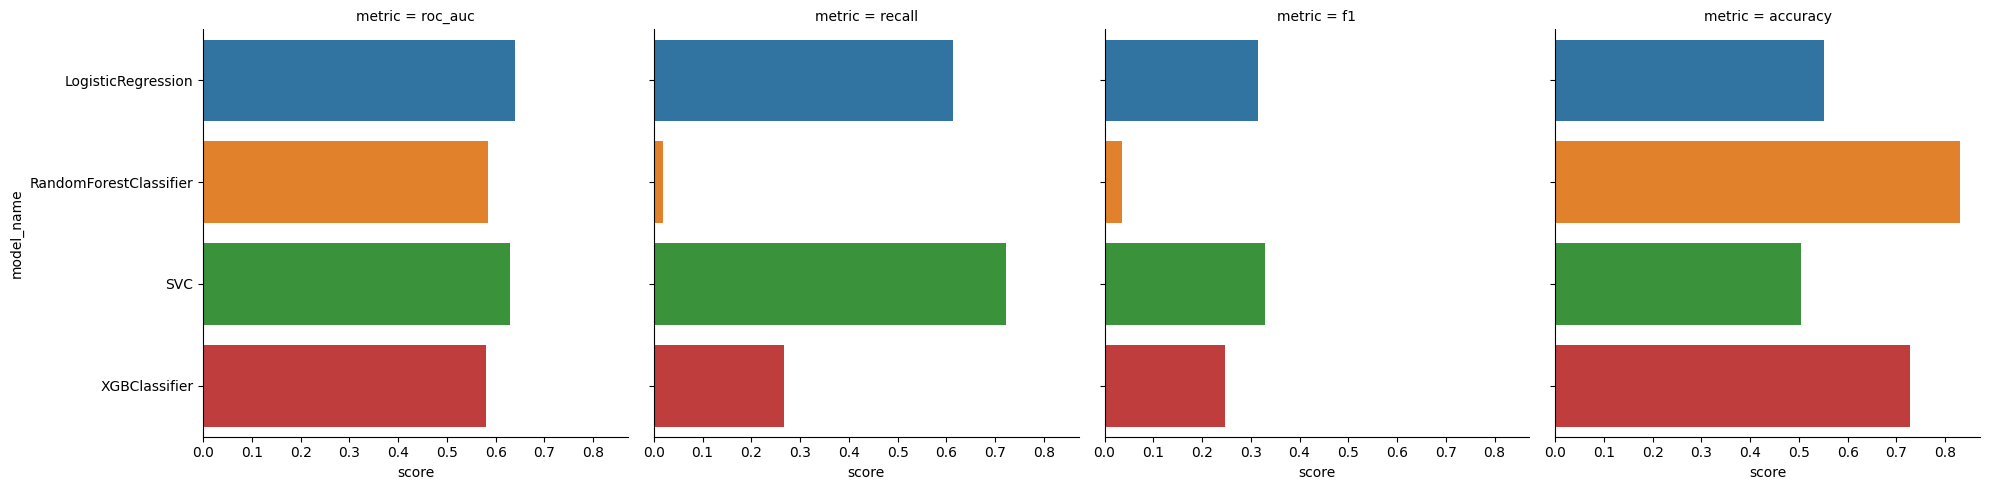

In [109]:
scores_naive = show_scores([lr, rf, svc, xgb], X_train, y_train, X_test, y_test)
# gather the scores in a dataframe for later
scores = scores_naive.rename({"score":"naive"},axis=1)

In [101]:
# X_test